Librerias utilizadas:

In [360]:
import pandas as pd
%pylab inline
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
url = 'https://raw.githubusercontent.com/diegoalvzfdez/master-data-science/master/preprocessed_data/csv_eye.csv'


## Estudio del Dataset Obtenido

Abrimos el fichero que hemos generado de los scripts anteriores

In [3]:
eye_df = pd.read_csv(url, sep = ";")
eye_df

,Max Depth Front,Max Depth Back,Max Curve Front,Max Curve Back,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment
0,2590,2670,6.24,4.56,3.72,3.64,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos
1,2432,2449,6.35,4.62,3.41,3.44,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos
2,2833,2842,5.04,3.51,5.54,5.35,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos
3,3101,3124,5.26,3.62,5.10,4.91,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos
4,2435,2692,5.25,3.44,4.61,5.25,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos
5,2527,2641,6.61,4.82,2.47,2.88,8.17,6.61,20,51.06,473,0.61,0.40,Pacientes tratados mediante anillos
6,2614,2735,6.66,4.87,3.28,3.01,8.03,6.60,79,50.68,502,0.71,1.28,Pacientes tratados mediante anillos
7,2339,2542,6.37,3.84,2.78,4.63,7.90,6.24,49,52.97,398,0.50,0.15,Pacientes tratados mediante anillos
8,2695,2665,6.42,4.76,3.35,4.80,7.87,6.57,48,52.61,533,1.92,3.82,Pacientes tratados mediante anillos
9,2568,2742,5.33,3.25,3.66,4.47,7.51,6.14,75,63.37,414,0.28,0.33,Pacientes tratados mediante anillos


Como podemos ver existe correlación entre las elevaciones y las curvaturas máximas entre la cara anterior y posterior.

In [4]:
eye_df.corr()

,Max Depth Front,Max Depth Back,Max Curve Front,Max Curve Back,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center
Max Depth Front,1.000000,0.918769,0.148906,0.180076,-0.101847,-0.177493,-0.008407,0.015985,0.038626,-0.166420,0.007536,0.099422,0.130465
Max Depth Back,0.918769,1.000000,0.135230,0.146079,-0.076268,-0.140805,-0.028989,-0.052281,0.045135,-0.140972,-0.008846,0.137598,0.141763
Max Curve Front,0.148906,0.135230,1.000000,0.931793,-0.744736,-0.435254,0.539516,0.518290,0.160518,-0.983708,0.556916,0.020488,0.055171
Max Curve Back,0.180076,0.146079,0.931793,1.000000,-0.675757,-0.485264,0.483655,0.519664,0.129078,-0.909349,0.544147,0.073439,0.134985
Max Variation Curve Front,-0.101847,-0.076268,-0.744736,-0.675757,1.000000,0.438443,-0.169504,-0.189050,-0.033004,0.740876,-0.443434,0.340081,0.306191
Max Variation Curve Back,-0.177493,-0.140805,-0.435254,-0.485264,0.438443,1.000000,-0.148551,-0.031054,-0.015036,0.425902,-0.194438,0.131606,-0.000394
Mean Curve Front,-0.008407,-0.028989,0.539516,0.483655,-0.169504,-0.148551,1.000000,0.896174,-0.140134,-0.526604,0.360344,0.115398,0.135702
Mean Curve Back,0.015985,-0.052281,0.518290,0.519664,-0.189050,-0.031054,0.896174,1.000000,-0.023933,-0.505723,0.309405,0.108834,0.163733
Age,0.038626,0.045135,0.160518,0.129078,-0.033004,-0.015036,-0.140134,-0.023933,1.000000,-0.168898,0.070463,0.089815,0.101973
K Max,-0.166420,-0.140972,-0.983708,-0.909349,0.740876,0.425902,-0.526604,-0.505723,-0.168898,1.000000,-0.545111,-0.001841,-0.032807


Vamos a intentar reducir la correlación, cogiendo únicamente un valor máximo de los dos que poseemos.

In [5]:
eye_df['Max Depth'] = np.where(eye_df['Max Depth Front'] > eye_df['Max Depth Back'], eye_df['Max Depth Front'], eye_df['Max Depth Back'])
eye_df.drop(['Max Depth Front', 'Max Depth Back'], axis = 1, inplace = True)
eye_df.head(5)

,Max Curve Front,Max Curve Back,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth
0,6.24,4.56,3.72,3.64,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670
1,6.35,4.62,3.41,3.44,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449
2,5.04,3.51,5.54,5.35,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842
3,5.26,3.62,5.10,4.91,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124
4,5.25,3.44,4.61,5.25,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692


In [6]:
eye_df['Max Curve'] = np.where(eye_df['Max Curve Front'] > eye_df['Max Curve Back'], eye_df['Max Curve Front'], eye_df['Max Curve Back'])
eye_df.drop(['Max Curve Front', 'Max Curve Back'], axis = 1, inplace = True)
eye_df.head(5)

,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve
0,3.72,3.64,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,6.24
1,3.41,3.44,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,6.35
2,5.54,5.35,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,5.04
3,5.10,4.91,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,5.26
4,4.61,5.25,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,5.25


Volvemos a comprobar la correlación entre las variables

In [7]:
eye_df.corr()

,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve
Max Variation Curve Front,1.000000,0.438443,-0.169504,-0.189050,-0.033004,0.740876,-0.443434,0.340081,0.306191,-0.050586,-0.744736
Max Variation Curve Back,0.438443,1.000000,-0.148551,-0.031054,-0.015036,0.425902,-0.194438,0.131606,-0.000394,-0.129462,-0.435254
Mean Curve Front,-0.169504,-0.148551,1.000000,0.896174,-0.140134,-0.526604,0.360344,0.115398,0.135702,-0.030029,0.539516
Mean Curve Back,-0.189050,-0.031054,0.896174,1.000000,-0.023933,-0.505723,0.309405,0.108834,0.163733,-0.049156,0.518290
Age,-0.033004,-0.015036,-0.140134,-0.023933,1.000000,-0.168898,0.070463,0.089815,0.101973,0.047569,0.160518
K Max,0.740876,0.425902,-0.526604,-0.505723,-0.168898,1.000000,-0.545111,-0.001841,-0.032807,-0.130900,-0.983708
Paqui Min,-0.443434,-0.194438,0.360344,0.309405,0.070463,-0.545111,1.000000,-0.013823,0.009084,-0.008025,0.556916
Distance Between Max Curve and Min Paqui,0.340081,0.131606,0.115398,0.108834,0.089815,-0.001841,-0.013823,1.000000,0.886387,0.158610,0.020488
Position of Most Curve Point Relative to Center,0.306191,-0.000394,0.135702,0.163733,0.101973,-0.032807,0.009084,0.886387,1.000000,0.162860,0.055171
Max Depth,-0.050586,-0.129462,-0.030029,-0.049156,0.047569,-0.130900,-0.008025,0.158610,0.162860,1.000000,0.123125


Podemos ver que hay una gran correlación entre las curvaturas y la k max

Vamos a sacar la máxima variación total de curvatura igual que en los procedimientos anteriores, para reducir el número de parámetros

In [8]:
eye_df['Max Variation Curve'] = np.where(eye_df['Max Variation Curve Front'] > eye_df['Max Variation Curve Back'], eye_df['Max Variation Curve Front'], eye_df['Max Variation Curve Back'])
eye_df.drop(['Max Variation Curve Front', 'Max Variation Curve Back'], axis = 1, inplace = True)
eye_df.head(5)

,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve,Max Variation Curve
0,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,6.24,3.72
1,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,6.35,3.44
2,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,5.04,5.54
3,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,5.26,5.10
4,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,5.25,5.25


In [9]:
eye_df.corr()

,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve,Max Variation Curve
Mean Curve Front,1.000000,0.896174,-0.140134,-0.526604,0.360344,0.115398,0.135702,-0.030029,0.539516,-0.160306
Mean Curve Back,0.896174,1.000000,-0.023933,-0.505723,0.309405,0.108834,0.163733,-0.049156,0.518290,-0.057291
Age,-0.140134,-0.023933,1.000000,-0.168898,0.070463,0.089815,0.101973,0.047569,0.160518,0.011298
K Max,-0.526604,-0.505723,-0.168898,1.000000,-0.545111,-0.001841,-0.032807,-0.130900,-0.983708,0.435817
Paqui Min,0.360344,0.309405,0.070463,-0.545111,1.000000,-0.013823,0.009084,-0.008025,0.556916,-0.211920
Distance Between Max Curve and Min Paqui,0.115398,0.108834,0.089815,-0.001841,-0.013823,1.000000,0.886387,0.158610,0.020488,0.234977
Position of Most Curve Point Relative to Center,0.135702,0.163733,0.101973,-0.032807,0.009084,0.886387,1.000000,0.162860,0.055171,0.103506
Max Depth,-0.030029,-0.049156,0.047569,-0.130900,-0.008025,0.158610,0.162860,1.000000,0.123125,-0.112890
Max Curve,0.539516,0.518290,0.160518,-0.983708,0.556916,0.020488,0.055171,0.123125,1.000000,-0.442067
Max Variation Curve,-0.160306,-0.057291,0.011298,0.435817,-0.211920,0.234977,0.103506,-0.112890,-0.442067,1.000000


Vemos que obtenemos una gran correlación entre las medias de las curvaturas, por lo que tambien vamos a unificar las medias de las curvaturas

In [10]:
eye_df['Mean Curve'] = np.where(eye_df['Mean Curve Front'] > eye_df['Mean Curve Back'], eye_df['Mean Curve Front'], eye_df['Mean Curve Back'])
eye_df.drop(['Mean Curve Front', 'Mean Curve Back'], axis = 1, inplace = True)
eye_df.head(5)

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve,Max Variation Curve,Mean Curve
0,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,6.24,3.72,7.86
1,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,6.35,3.44,7.86
2,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,5.04,5.54,7.84
3,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,5.26,5.10,7.93
4,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,5.25,5.25,7.20


In [12]:
eye_df.corr()

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve,Max Variation Curve,Mean Curve
Age,1.000000,-0.168898,0.070463,0.089815,0.101973,0.047569,0.160518,0.011298,-0.140134
K Max,-0.168898,1.000000,-0.545111,-0.001841,-0.032807,-0.130900,-0.983708,0.435817,-0.526604
Paqui Min,0.070463,-0.545111,1.000000,-0.013823,0.009084,-0.008025,0.556916,-0.211920,0.360344
Distance Between Max Curve and Min Paqui,0.089815,-0.001841,-0.013823,1.000000,0.886387,0.158610,0.020488,0.234977,0.115398
Position of Most Curve Point Relative to Center,0.101973,-0.032807,0.009084,0.886387,1.000000,0.162860,0.055171,0.103506,0.135702
Max Depth,0.047569,-0.130900,-0.008025,0.158610,0.162860,1.000000,0.123125,-0.112890,-0.030029
Max Curve,0.160518,-0.983708,0.556916,0.020488,0.055171,0.123125,1.000000,-0.442067,0.539516
Max Variation Curve,0.011298,0.435817,-0.211920,0.234977,0.103506,-0.112890,-0.442067,1.000000,-0.160306
Mean Curve,-0.140134,-0.526604,0.360344,0.115398,0.135702,-0.030029,0.539516,-0.160306,1.000000


Como estos valores están sacados del Pentacam, la máquina que nos permite obtener los mapas paquimétricos, de elevación y de curvatura , empleando un describe podemos ver si tenemos algún dato máximo o mínimo que no se ajusten a un ojo real. En este caso, con ayuda de un especialista en óptica, podemos ver que no tenemos ningún dato fuera de la normalidad.

In [13]:
eye_df.describe()

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve,Max Variation Curve,Mean Curve
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,42.121475,53.808872,468.449024,1.503449,1.687657,2851.835141,6.352169,3.552560,7.821931
std,13.967758,6.350378,46.357544,1.362391,1.396684,381.546964,0.670969,1.963347,0.304846
min,15.000000,42.730000,297.000000,0.100000,0.060000,1854.000000,3.850000,1.290000,6.540000
25%,31.000000,49.190000,435.000000,0.760000,0.780000,2622.000000,5.930000,2.710000,7.630000
50%,42.000000,52.490000,472.000000,1.080000,1.250000,2807.000000,6.430000,3.240000,7.830000
75%,50.000000,56.930000,498.000000,1.490000,2.070000,3003.000000,6.860000,4.000000,8.020000
max,95.000000,88.100000,617.000000,6.930000,6.900000,4787.000000,7.900000,31.000000,8.680000


Vamos a comprobar el numero de muestras que poseemos de cada una de las etiquetas

In [14]:
eye_df.groupby(['Treatment'])['Treatment'].count()

Treatment
Pacientes sin operar                        230
Pacientes tratados mediante anillos         169
Pacientes tratados mediante crosslinking     62
Name: Treatment, dtype: int64

## Modelado

Como podemos ver, tenemos el dataset bastante desbalanceado, siendo el número de pacientes sin tratar mayor que el numero de pacientes tratados mediante anillos y mediante crosslinking.

Vamos a intentar, en primera instancia, crear un clasificador capaz de detectar si un paciente se le debe operar o no, por lo que debemos crear una nueva columna

In [0]:
eye_df_cl_1 = copy.deepcopy(eye_df)

In [86]:
eye_df_cl_1['Operated'] = np.where(eye_df_cl_1['Treatment'] == 'Pacientes sin operar', 0, 1)
eye_df_cl_1.head(5)

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve,Max Variation Curve,Mean Curve,Operated
0,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,6.24,3.72,7.86,1
1,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,6.35,3.44,7.86,1
2,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,5.04,5.54,7.84,1
3,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,5.26,5.10,7.93,1
4,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,5.25,5.25,7.20,1


Como podemos ver, en este caso tenemos el dataset mucho más balaceado que en el caso anterior, por lo que se convierte en un buen inicio para probar clasificadores

In [87]:
eye_df_cl_1.groupby(['Operated'])['Operated'].count()

Operated
0    230
1    231
Name: Operated, dtype: int64

Para probar los modelos, creamos los vectores x e y que nos permitirán entrenarlos

In [0]:
x = eye_df_cl_1[['Max Depth', 'Max Curve', 'Max Variation Curve', 'Mean Curve', 'Age', 'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui', 'Position of Most Curve Point Relative to Center']]
y = eye_df_cl_1['Operated']

### Regresión Logística

Vamos a comenzar con una regresión logistica

In [0]:
clf = LogisticRegression()

In [90]:
clf.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Para probar los clasificadores, vamos a emplear una validación cruzada. Vamos a utilizar la siguiente función para valorar mediante la función classification_report los resultados obtenidos mediante la validación cruzada. Esta función la introduciremos dentro de un make_scorer.

In [0]:
def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

Como podemos comprobar, tenemos un accuracy medio en las 10 iteraciones de un 70 %.

In [92]:
cross_val_score(clf, x, y, cv=10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        23
           1       0.73      0.67      0.70        24

    accuracy                           0.70        47
   macro avg       0.70      0.70      0.70        47
weighted avg       0.70      0.70      0.70        47

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.69      0.78      0.73        23

    accuracy                           0.72        46
   macro avg       0.72      0.72      0.72        46
weighted avg       0.72      0.72      0.72        46

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.80      0.70      0.74        23

    accuracy                           0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46

              preci

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.7093432007400555

### K Nearest Neighbors

Una vez probada la regresión logística, vamos a probar a implementar un k nearest neighbors. Para este caso, para encontrar los hiperparámetros más óptimos, vamos a emplear un gridsearch. Vamos a utilizar un número de vecinos bajo ya que el número de muestras de nuestro dataset es bajo.

In [0]:
clf_kn = GridSearchCV(KNeighborsClassifier(),
                  param_grid={"n_neighbors":np.arange(2, 20)},
                  cv=5,
                  scoring='accuracy')

In [94]:
clf_kn.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Como podemos ver, para este caso los k nearest neighbors no funcionan tan bien como el modelo anterior, obteniendo un accuracy máximo de 61%, lo cual es inferior al 70 % de la regresión logística. 

In [95]:
clf_kn.best_score_

0.613882863340564

In [96]:
clf_kn.best_params_

{'n_neighbors': 9}

### SVM

El siguiente paso es probar con un Support Vector Machine. Vamos a comprobar los distintos tipos que existen de este clasificador para comprobar si alguno de estos se puede ajustar más al dataset que tenemos. En primer lugar vamos a probar con un kernel linear, empleando un gridsearch para encontrar el mejor hiperparámetro. Obtenemos un resultado parecido a la regresión logística, con aproximadamente un 70 % de accuracy.

In [0]:
clf_svml = GridSearchCV(SVC(kernel="linear",),
                  param_grid={"C":[1,10,100,1000,10000]},
                  cv=10,
                  scoring="accuracy")

In [28]:
clf_svml.fit(x, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
clf_svml.best_score_

0.702819956616052

In [30]:
clf_svml.best_params_

{'C': 10}

### Decision Tree

Una vez comprobados los SVM, vamos a comprobar los árboles de decisión. Como podemos observar, mediante el árbol de decisión somos capaces de conseguir un poco más de accuracy comparado con la regresión logística.

In [0]:
clf_dt = GridSearchCV(DecisionTreeClassifier(),
                      param_grid={"min_samples_leaf":np.arange(1,100),
                                 'max_depth': np.arange(2, 20)},
                     cv = 10,
                     scoring = "accuracy")

In [32]:
clf_dt.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn',...
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22

In [33]:
clf_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 7}

In [34]:
clf_dt.best_score_

0.7136659436008677

### Random Forest

Una vez visto el resultado satisfactorio de los árboles de decisión, vamos a intentar implementar un Random Forest. Como hemos podido ver, heredando el valor de min_samples_leaf del árbol de decisión, hemos conseguido mejorar el accuracy hasta un 75%

In [0]:
clf_rf = GridSearchCV(RandomForestClassifier(min_samples_leaf = 4),
                      param_grid = {'n_estimators': np.arange(20,300, 20),
                                    'max_depth': np.arange(2,10)
                      },
                      cv = 10,
                      scoring = 'accuracy',
                      n_jobs = -1)

In [36]:
clf_rf.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [37]:
clf_rf.best_score_

0.7483731019522777

In [38]:
clf_rf.best_params_

{'max_depth': 9, 'n_estimators': 160}

In [0]:
clf_rf_good = clf_rf.best_estimator_

Mediante el método feature_importances_ podemos ver cómo influyen cada una de las variables a la decisión tomada por el Random Forest, siendo la más importante la máxima variación de la curvatura y la menos importante la media de las curvaturas.

In [40]:
clf_rf_good.feature_importances_

array([0.11334154, 0.12124215, 0.18427532, 0.04775782, 0.1672021 ,
       0.14219228, 0.08001251, 0.07936108, 0.06461521])

In [41]:
x.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Mean Curve', 'Age',
       'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center'],
      dtype='object')

Vamos a  hacer una prueba eliminando las columnas menos influyentes, para comprobar como se comporta el Random Forest, y como podemos comprobar, eliminando la media de las curvaturas, podemos subir a un 76% el accuracy.

In [0]:
x_upgrade = eye_df_cl_1[['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui', 'Position of Most Curve Point Relative to Center']]

In [43]:
clf_rf.fit(x_upgrade, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [44]:
clf_rf.best_params_

{'max_depth': 7, 'n_estimators': 120}

In [45]:
clf_rf.best_score_

0.7570498915401301

Vamos a intentar volver a iterar eliminando un parámetro más que no sea determinante para el predictor. Como podemos ver, en este caso el parámetro menos influyente es la posición del punto más curvo con respecto al centro. En este caso, perdemos accuracy a pesar de quitar un parámetro poco influyente, por lo que vamos a mantener el vector x anterior.

In [0]:
clf_rf_good = clf_rf.best_estimator_

In [47]:
clf_rf_good.feature_importances_

array([0.12274128, 0.17764288, 0.18752464, 0.15819823, 0.12878742,
       0.08561035, 0.0795373 , 0.05995791])

In [48]:
x_upgrade.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max',
       'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center'],
      dtype='object')

In [0]:
x_upgrade_2 = eye_df_cl_1[['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui']]

In [50]:
clf_rf.fit(x_upgrade_2, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [51]:
clf_rf.best_score_

0.7505422993492408

In [52]:
clf_rf.best_params_

{'max_depth': 5, 'n_estimators': 220}

### XGBoost

Para el siguiente paso vamos a comprobar la eficacia de un xgboost en nuestro sistema. Como podemos ver se comporta de manera parecida al Random Forest, obteniendo resultados del 76 % de aciertos.

In [0]:
clf_xg = GridSearchCV(XGBClassifier(),
                      param_grid = {'max_depth': np.arange(2,10),
                                   "learning_rate": np.arange(0.04, 0.32, 0.04),
                                   "n_estimators": np.arange(100, 150, 10)},
                      cv = 10,
                      scoring = 'accuracy',
                      n_jobs = -1
         )

In [386]:
clf_xg.fit(x_upgrade, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32]),
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])

In [387]:
clf_xg.best_params_

{'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 100}

In [388]:
clf_xg.best_score_

0.7635574837310195

### Gradient Boosted Trees

Para el siguiente caso vamos a utilizar un Gradient Boosted Tree, de la libreria de Scikit Learn. Como podemos ver, el resultado obtenido no supera a los resultados del XGBoost, por lo que nuestro mejor resultado sigue siendo el 76.35 %.



In [0]:
clf_gbt = GridSearchCV(ensemble.GradientBoostingClassifier(),
                      param_grid = {'max_depth': np.arange(2,10),
                                   "n_estimators": np.arange(1000, 2000, 100),
                                   "max_leaf_nodes": np.arange(2, 6, 1),
                                   "min_samples_leaf": np.arange(2, 6, 1)},
                      cv = 10,
                      scoring = 'accuracy',
         )

In [378]:
clf_gbt.fit(x_upgrade, y)

KeyboardInterrupt: ignored

In [0]:
clf_gbt.best_params_

In [0]:
clf_gbt.best_score_

### Ensamblaje de modelos

Una vez que tenemos ya una buena serie de modelos creados, y con sus métricas establecidas, vamos a intentar combinarlos para conseguir obtener mejores resultados. En primera instancia vamos a intentar crear un VottingClassifier para intentar combinar los dos clasificadores que nos dieron mejores resultados. Como podemos ver, si juntamos el Gradient Boosted Tree con el XGBoost (el mejor clasificador hasta ahora), no obtenemos mejores resultados que con el Random Forest solo.

In [0]:
clf_xg.best_params_

In [0]:
clf_gbt.best_params_

In [0]:
clf_votting = VotingClassifier(estimators=[('xgboost', XGBClassifier(learning_rate = 0.08, max_depth = 3, n_estimators = 100)), 
                                           ('gbt', ensemble.GradientBoostingClassifier(max_depth = 2, max_leaf_nodes = 5, min_samples_leaf = 4, n_estimators = 1300))])

In [0]:
#para entrenar al sistema utilizaremos una validación cruzada

cross_val_score(clf_votting, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

Si por otro lado juntamos el mejor clasificador que hemos obtenido, el XGBoost, con el Random Forest, podemos ver que mejoramos los resultados con el intento anterior, pero no llegamos a superar los resultados obtenidos con el XGBoost por separado.

In [0]:
clf_rf.best_params_

{'max_depth': 8, 'n_estimators': 220}

In [0]:
clf_votting_v2 = VotingClassifier(estimators=[('xgboost', XGBClassifier(learning_rate = 0.08, max_depth = 3, n_estimators = 100)), 
                                           ('rf', RandomForestClassifier(min_samples_leaf = 4, max_depth = 9, n_estimators = 80))])

In [0]:
cross_val_score(clf_votting_v2, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.71      0.87      0.78        23
         Yes       0.84      0.67      0.74        24

   micro avg       0.77      0.77      0.77        47
   macro avg       0.78      0.77      0.76        47
weighted avg       0.78      0.77      0.76        47

              precision    recall  f1-score   support

          No       0.76      0.70      0.73        23
         Yes       0.72      0.78      0.75        23

   micro avg       0.74      0.74      0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.74      0.74      0.74        46

              precision    recall  f1-score   support

          No       0.75      0.91      0.82        23
         Yes       0.89      0.70      0.78        23

   micro avg       0.80      0.80      0.80        46
   macro avg       0.82      0.80      0.80        46
weighted avg       0.82      0.80      0.80        46

              preci

0.7526827012025902

Como último intento, vamos a intentar juntar los tres clasificadores en uno solo, para comprobar los resultados que obtenemos. Como podemos ver, se sigue notando una mejoría, pero seguimos sin superar el 76,35 % del accuracy obtenido con el XGBoost

In [0]:
clf_votting_v3 = VotingClassifier(estimators=[('xgboost', XGBClassifier(learning_rate = 0.08, max_depth = 3, n_estimators = 100)), 
                                           ('rf', RandomForestClassifier(min_samples_leaf = 4, max_depth = 9, n_estimators = 80)),
                                           ('gbt', ensemble.GradientBoostingClassifier(max_depth = 2, max_leaf_nodes = 5, min_samples_leaf = 4, n_estimators = 1300))])

In [0]:
cross_val_score(clf_votting_v3, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.70      0.83      0.76        23
         Yes       0.80      0.67      0.73        24

   micro avg       0.74      0.74      0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

              precision    recall  f1-score   support

          No       0.80      0.70      0.74        23
         Yes       0.73      0.83      0.78        23

   micro avg       0.76      0.76      0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46

              precision    recall  f1-score   support

          No       0.77      0.87      0.82        23
         Yes       0.85      0.74      0.79        23

   micro avg       0.80      0.80      0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46

              preci

0.7592506938020351

### Bagging

Una vez hemos terminado de probar modelos, vamos a tratar de mejorar el Decision Tree con la técnica del Bagging. Como podemos ver, mejoramos un poco los resultados obtenidos pero sin llegar a los resultados obtenidos por el Random Forest ni, por supuesto, por el XGBoost.

In [0]:
clf_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 3}

In [0]:
clf_xbg_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf = 3, max_depth = 6), n_estimators=100, oob_score =True)

In [0]:
cross_val_score(clf_xbg_bag, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.69      0.78      0.73        23
         Yes       0.76      0.67      0.71        24

   micro avg       0.72      0.72      0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47

              precision    recall  f1-score   support

          No       0.79      0.65      0.71        23
         Yes       0.70      0.83      0.76        23

   micro avg       0.74      0.74      0.74        46
   macro avg       0.75      0.74      0.74        46
weighted avg       0.75      0.74      0.74        46

              precision    recall  f1-score   support

          No       0.80      0.87      0.83        23
         Yes       0.86      0.78      0.82        23

   micro avg       0.83      0.83      0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46

              preci

0.7223404255319149

### Deep Learning

Con las nociones aprendidas durante el curso, vamos a intentar implementar una red neuronal capaz de superar los resultados obtenidos por el XGBoost, sin llegar a producir overfitting.

In [60]:
x_upgrade.shape

(461, 8)

In [0]:
x_upgrade

Vamos a normalizar los datos de nuestro dataset para que sean más sencillos de tratar para nuestra red

In [201]:
x_upgrade.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max',
       'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center', 'Max Depth Max'],
      dtype='object')

In [0]:
x_upgrade['Max Depth Norm'] = x_upgrade['Max Depth'] / x_upgrade['Max Depth'].max()
x_upgrade['Max Curve Norm'] = x_upgrade['Max Curve'] / x_upgrade['Max Curve'].max()
x_upgrade['Max Variation Curve Norm'] = x_upgrade['Max Variation Curve'] / x_upgrade['Max Variation Curve'].max()
x_upgrade['Age Norm'] = x_upgrade['Age'] / x_upgrade['Age'].max()
x_upgrade['K Max Norm'] = x_upgrade['K Max'] / x_upgrade['K Max'].max()
x_upgrade['Paqui Min Norm'] = x_upgrade['Paqui Min'] / x_upgrade['Paqui Min'].max()
x_upgrade['Distance Between Max Curve and Min Paqui Norm'] = x_upgrade['Distance Between Max Curve and Min Paqui'] / x_upgrade['Distance Between Max Curve and Min Paqui'].max()
x_upgrade['Position of Most Curve Point Relative to Center Norm'] = x_upgrade['Position of Most Curve Point Relative to Center'] / x_upgrade['Position of Most Curve Point Relative to Center'].max()

In [0]:
x_upgrade_dl = x_upgrade[['Max Depth Norm', 'Max Curve Norm', 'Max Variation Curve Norm', 'Age Norm', 'K Max Norm', 'Paqui Min Norm', 'Distance Between Max Curve and Min Paqui Norm', 'Position of Most Curve Point Relative to Center Norm']]

In [0]:
x_train_list = x_upgrade_dl.values
y_cat = y.values
y_list = y.values
y_cat = utils.to_categorical(y_cat)

Vamos a utilizar esta función enseñada durante el curso para ir comprobando los resultados que vamos obteniendo

In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  

Vamos a intentar crear una red neuronal sencilla para observar los resultados obtenidos

In [0]:
def build_model():
  m = models.Sequential()
  m.add(layers.Dense(32, input_shape = (8, ), activation='relu'))
  m.add(layers.Dense(16, activation='relu'))
  m.add(layers.Dense(2, activation='softmax'))
  return m

In [0]:
model = build_model()

In [0]:
model.compile(
    optimizer=optimizers.rmsprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )

In [271]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_41 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 34        
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [272]:
h = model.fit(x_train_list, y_cat, epochs=40, batch_size=10, validation_split=.2)

Train on 368 samples, validate on 93 samples
Epoch 1/40
368/368 [==============================] - 1s 2ms/step - loss: 0.6829 - categorical_accuracy: 0.5870 - val_loss: 1.0033 - val_categorical_accuracy: 0.0000e+00
Epoch 2/40
368/368 [==============================] - 0s 324us/step - loss: 0.6668 - categorical_accuracy: 0.6277 - val_loss: 0.9920 - val_categorical_accuracy: 0.0000e+00
Epoch 3/40
368/368 [==============================] - 0s 344us/step - loss: 0.6554 - categorical_accuracy: 0.6277 - val_loss: 0.9496 - val_categorical_accuracy: 0.0000e+00
Epoch 4/40
368/368 [==============================] - 0s 332us/step - loss: 0.6498 - categorical_accuracy: 0.6277 - val_loss: 0.8872 - val_categorical_accuracy: 0.0000e+00
Epoch 5/40
368/368 [==============================] - 0s 332us/step - loss: 0.6453 - categorical_accuracy: 0.6277 - val_loss: 0.9660 - val_categorical_accuracy: 0.0000e+00
Epoch 6/40
368/368 [==============================] - 0s 372us/step - loss: 0.6388 - categorical_

Como podemos ver, con esta red sencilla no nos acercamos nada a los resultados obtenidos por el XGBoost.

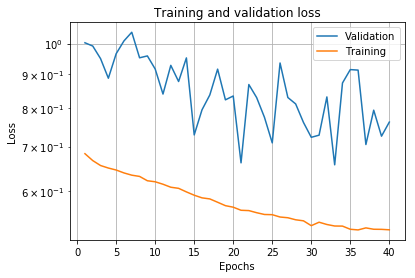

In [273]:
plot_metric(h, 'loss')

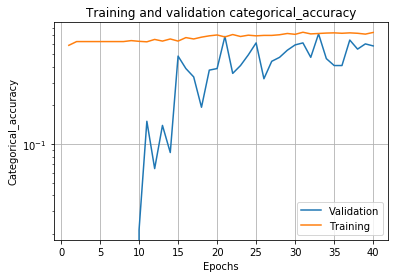

In [274]:
plot_metric(h, 'categorical_accuracy')

Vamos a jugar un poco con la configuración del entrenamiento para conseguir encontrar la configuración más idonea.

Train on 368 samples, validate on 93 samples
Epoch 1/160
368/368 [==============================] - 1s 3ms/step - loss: 0.6806 - categorical_accuracy: 0.5734 - val_loss: 0.8616 - val_categorical_accuracy: 0.0000e+00
Epoch 2/160
368/368 [==============================] - 0s 732us/step - loss: 0.6566 - categorical_accuracy: 0.6277 - val_loss: 0.9376 - val_categorical_accuracy: 0.0000e+00
Epoch 3/160
368/368 [==============================] - 0s 671us/step - loss: 0.6473 - categorical_accuracy: 0.6277 - val_loss: 1.1228 - val_categorical_accuracy: 0.0000e+00
Epoch 4/160
368/368 [==============================] - 0s 727us/step - loss: 0.6450 - categorical_accuracy: 0.6277 - val_loss: 0.9360 - val_categorical_accuracy: 0.0000e+00
Epoch 5/160
368/368 [==============================] - 0s 701us/step - loss: 0.6376 - categorical_accuracy: 0.6277 - val_loss: 0.9440 - val_categorical_accuracy: 0.0000e+00
Epoch 6/160
368/368 [==============================] - 0s 681us/step - loss: 0.6339 - catego

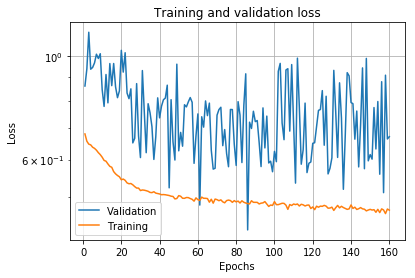

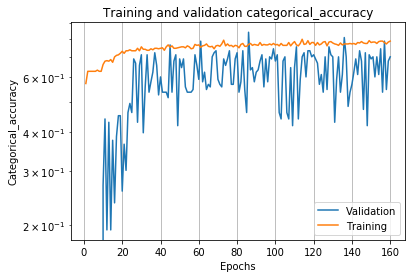

In [284]:
model = build_model()
model.compile(
    optimizer=optimizers.rmsprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )
h = model.fit(x_train_list, y_cat, epochs=160, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'categorical_accuracy')

Podemos ver que con un optimizador adam nuestra red funciona mejor.

Train on 368 samples, validate on 93 samples
Epoch 1/160
368/368 [==============================] - 1s 3ms/step - loss: 0.6665 - categorical_accuracy: 0.6277 - val_loss: 0.9760 - val_categorical_accuracy: 0.0000e+00
Epoch 2/160
368/368 [==============================] - 0s 785us/step - loss: 0.6485 - categorical_accuracy: 0.6304 - val_loss: 1.0817 - val_categorical_accuracy: 0.0000e+00
Epoch 3/160
368/368 [==============================] - 0s 732us/step - loss: 0.6409 - categorical_accuracy: 0.6277 - val_loss: 0.9624 - val_categorical_accuracy: 0.0000e+00
Epoch 4/160
368/368 [==============================] - 0s 715us/step - loss: 0.6282 - categorical_accuracy: 0.6304 - val_loss: 1.0577 - val_categorical_accuracy: 0.0000e+00
Epoch 5/160
368/368 [==============================] - 0s 713us/step - loss: 0.6178 - categorical_accuracy: 0.6277 - val_loss: 0.9529 - val_categorical_accuracy: 0.0108
Epoch 6/160
368/368 [==============================] - 0s 729us/step - loss: 0.6059 - categorica

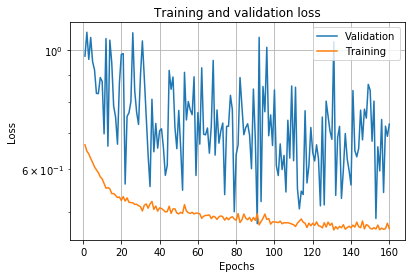

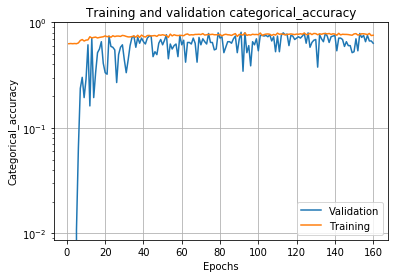

In [287]:
model = build_model()
model.compile(
    optimizer=optimizers.adam(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )
h = model.fit(x_train_list, y_cat, epochs=160, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'categorical_accuracy')

En este punto, vamos a intentar modificar la configuración de la red para mejorar los resultados

In [0]:
def build_model():
  m = models.Sequential()
  m.add(layers.Dense(32, input_dim = 8, kernel_initializer='normal', activation='relu'))
  m.add(layers.Dense(16, kernel_initializer='normal', activation='relu'))
  #m.add(layers.Dense(8, kernel_initializer='normal', activation='relu'))
  #m.add(layers.Dropout(0.1))
  m.add(layers.Dense(2, kernel_initializer='normal', activation='sigmoid'))
  return m

Train on 368 samples, validate on 93 samples
Epoch 1/300
368/368 [==============================] - 3s 7ms/step - loss: 0.6876 - categorical_accuracy: 0.6277 - val_loss: 0.7454 - val_categorical_accuracy: 0.0000e+00
Epoch 2/300
368/368 [==============================] - 0s 766us/step - loss: 0.6710 - categorical_accuracy: 0.6277 - val_loss: 0.9099 - val_categorical_accuracy: 0.0000e+00
Epoch 3/300
368/368 [==============================] - 0s 770us/step - loss: 0.6636 - categorical_accuracy: 0.6277 - val_loss: 0.9288 - val_categorical_accuracy: 0.0000e+00
Epoch 4/300
368/368 [==============================] - 0s 810us/step - loss: 0.6600 - categorical_accuracy: 0.6277 - val_loss: 0.9681 - val_categorical_accuracy: 0.0000e+00
Epoch 5/300
368/368 [==============================] - 0s 761us/step - loss: 0.6574 - categorical_accuracy: 0.6277 - val_loss: 0.9884 - val_categorical_accuracy: 0.0000e+00
Epoch 6/300
368/368 [==============================] - 0s 757us/step - loss: 0.6563 - catego

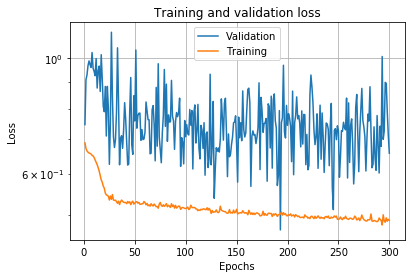

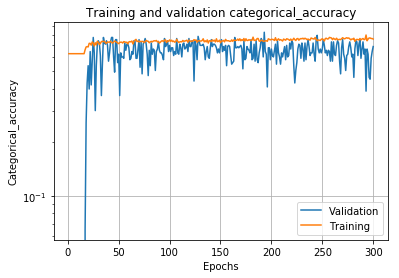

In [327]:
model = build_model()
model.compile(
    optimizer=optimizers.adam(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )
h = model.fit(x_train_list, y_cat, epochs=300, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'categorical_accuracy')

Viendo que no somos capaces de mejorar los resultados, vamos a intentar modificar los datos de entrada. Vamos a probar con estandarizar las escalas de los datos de entrada.

In [339]:
x_upgrade.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max',
       'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center', 'Max Depth Norm',
       'Max Curve Norm', 'Max Variation Curve Norm', 'Age Norm', 'K Max Norm',
       'Paqui Min Norm', 'Distance Between Max Curve and Min Paqui Norm',
       'Position of Most Curve Point Relative to Center Norm'],
      dtype='object')

In [0]:
sc = StandardScaler()
x_upgrade.drop(['Max Depth Norm', 'Max Curve Norm', 'Max Variation Curve Norm', 'Age Norm', 'K Max Norm',
       'Paqui Min Norm', 'Distance Between Max Curve and Min Paqui Norm',
       'Position of Most Curve Point Relative to Center Norm'], axis = 1, inplace = True)
x_SC = sc.fit_transform(x_upgrade.values)

In [341]:
x_SC

array([[-0.47709115, -0.1673565 ,  0.08537577, ..., -0.8518976 ,
        -0.53159119, -0.42837659],
       [-1.05694136, -0.00323644, -0.05739278, ..., -0.93827718,
        -0.70794347, -0.52155534],
       [-0.02580502, -1.95775714,  1.01337129, ..., -1.30539043,
         2.4737456 ,  2.12328765],
       ...,
       [ 0.88988604,  0.98148391, -0.34292986, ...,  0.57336559,
        -0.28175879,  0.22387466],
       [-0.37214089,  0.14596361, -0.20016132, ...,  1.8042747 ,
        -0.80346762, -0.84409717],
       [ 0.82691588, -0.07783647,  0.67174656, ...,  0.29263193,
        -0.24501873,  0.46757293]])

Vamos a separar las muestras en train y test, para realizar las comprobaciones necesarias posteriormente.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_SC, y_list, test_size=0.3)

In [343]:
X_train.shape

(322, 8)

In [0]:
def build_model():
  m = models.Sequential()
  m.add(layers.Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
  m.add(layers.Dense(4, kernel_initializer='normal', activation='relu'))
  #m.add(layers.Dense(8, kernel_initializer='normal', activation='relu'))
  #m.add(layers.Dropout(0.1))
  m.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
  return m

Train on 257 samples, validate on 65 samples
Epoch 1/200
257/257 [==============================] - 3s 12ms/step - loss: 0.6932 - binary_accuracy: 0.5097 - val_loss: 0.6925 - val_binary_accuracy: 0.5538
Epoch 2/200
257/257 [==============================] - 0s 864us/step - loss: 0.6924 - binary_accuracy: 0.5837 - val_loss: 0.6914 - val_binary_accuracy: 0.6615
Epoch 3/200
257/257 [==============================] - 0s 819us/step - loss: 0.6905 - binary_accuracy: 0.6693 - val_loss: 0.6884 - val_binary_accuracy: 0.6769
Epoch 4/200
257/257 [==============================] - 0s 790us/step - loss: 0.6856 - binary_accuracy: 0.6848 - val_loss: 0.6803 - val_binary_accuracy: 0.6923
Epoch 5/200
257/257 [==============================] - 0s 816us/step - loss: 0.6753 - binary_accuracy: 0.6887 - val_loss: 0.6664 - val_binary_accuracy: 0.7077
Epoch 6/200
257/257 [==============================] - 0s 803us/step - loss: 0.6581 - binary_accuracy: 0.7004 - val_loss: 0.6459 - val_binary_accuracy: 0.7385
Ep

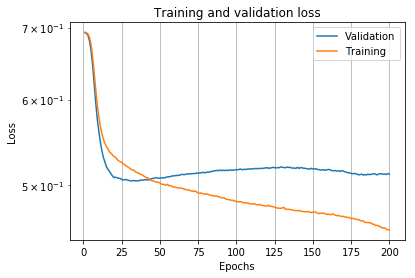

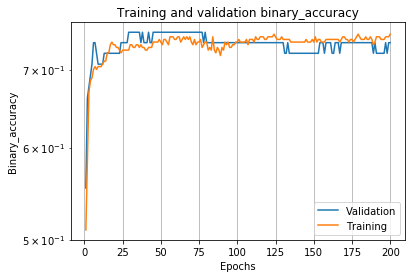

In [356]:
model = build_model()
model.compile(
    optimizer=optimizers.adam(),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]   
    )
h = model.fit(X_train, y_train, epochs=200, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'binary_accuracy')

In [357]:
eval_model=model.evaluate(X_train, y_train)
eval_model

322/322 [==============================] - 0s 78us/step


[0.4638240074519045, 0.7422360248447205]

Vamos a comprobar los resultados obtenidos en la red neuronal y mostrarla en una matriz de confusión. Como podemos observar, con el conjunto de test obtenemos un accuracy de 0.73 y una precisión de 0.76.

In [361]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51 16]
 [21 51]]


In [367]:
Accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[1][0] + cm[0][1])
print ("El accuracy es " + str(Accuracy))
Precission = (cm[0][0]) / (cm[0][0] + cm[0][1])
print ("La precisión es " + str(Precission))

El accuracy es 0.7338129496402878
La precisión es 0.7611940298507462


Para hacer una comprobación final, vamos a entrenar el XGBoost con un train_test_split para compararlo con los resultado obtenidos con la red neuronal.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_upgrade, y, test_size=0.3)

In [0]:
xgb_clas = GridSearchCV(XGBClassifier(),
                      param_grid = {'max_depth': np.arange(2,10),
                                   "learning_rate": np.arange(0.04, 0.32, 0.04),
                                   "n_estimators": np.arange(100, 150, 10)},
                      cv = 10,
                      scoring = 'accuracy',
                      n_jobs = -1
         )

In [390]:
xgb_clas.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32]),
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])

In [392]:
y_result = xgb_clas.best_estimator_.predict(X_test)
y_result =(y_result>0.5)
cm_xgb = confusion_matrix(y_test, y_result)
print(cm_xgb)

[[45 23]
 [17 54]]


Como se puede observar, en una prueba real las métricas del XGBoost bajan debido a que se ha producido cierto OverFitting durante el entrenamiento.

In [393]:
Accuracy = (cm_xgb[0][0] + cm_xgb[1][1]) / (cm_xgb[0][0] + cm_xgb[1][1] + cm_xgb[1][0] + cm_xgb[0][1])
print ("El accuracy es " + str(Accuracy))
Precission = (cm_xgb[0][0]) / (cm_xgb[0][0] + cm_xgb[0][1])
print ("La precisión es " + str(Precission))

El accuracy es 0.7122302158273381
La precisión es 0.6617647058823529
